In [ ]:
!pip install torchvision==0.14.1

In [ ]:
# Transformers installation
! pip install transformers datasets
!pip install -q pytorchvideo evaluate

Nếu test data vòng loại - 2 của BTC

In [ ]:
!pip install kaggle

from google.colab import userdata
import os

os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

In [ ]:
!kaggle datasets download -d haitonthat/data-test-vl-after-processing

In [ ]:
! unzip "/content/data-test-vl-after-processing.zip"

Test val dataset after Post Processing

In [ ]:
!gdown --id 1B6RhDvRsBOqAw4E8qeFf6ZjpnJensgCi

In [ ]:
!unzip '/content/v2_part2.zip'

Đoạn này ko cần cho lắm

In [ ]:
import subprocess
import os

def convert_video(input_path):
    parts = input_path.split('/')

    videoName = parts[-1]

    className = parts[-2]
    #Tạo thư mục chứa video đã chuyển đổi (sửa đường dẫn nếu cần thiết)
    output_dir = f"/content/after_process/{className}"
    print(output_dir)
    if not os.path.exists(output_dir):
      os.makedirs(output_dir)
      print("Đã tạo")
    #Thư mục chứa video đã chuyển đổi (sửa đường dẫn nếu cần thiết)
    output_path = f"/content/after_process/{className}/{videoName}"
    command = [
        'ffmpeg',
        '-i', input_path,
        '-c:v', 'libx264',
        '-crf', '23',
        output_path
    ]

    subprocess.run(command)

    print(f'Video đã được chuyển đổi và lưu tại: {output_path}')

In [ ]:
data_dir = "/content/content/drive/MyDrive/AI4LIFE2024-DATA/Test - Vòng loại - 2"
for className in os.listdir(data_dir):
        class_dir = os.path.join(data_dir, className)
        if os.path.isdir(class_dir):
            for video_file in os.listdir(class_dir):
              video_path = os.path.join(class_dir, video_file)
              convert_video(video_path)

Nhớ phải đổi tên video trước khi chạy, đổi tên video

In [ ]:
import os

# Define the root directory of your dataset
dataset_root = '/content/content/output3/val'

# Initialize an empty list to store the paths of all video files
all_video_file_paths = []

# Walk through the directory structure
for root, dirs, files in os.walk(dataset_root):
    for file in files:
        # Check if the file is a video file by its extension (assuming .mp4)
        if 1:
            # Construct the full path of the file
            full_path = os.path.join(root, file)
            # Append the full path to the list
            all_video_file_paths.append(full_path)
print(all_video_file_paths)

['/content/content/output3/val/incline bench press/incline_bench_press_32.mp4', '/content/content/output3/val/incline bench press/incline_bench_press_28.mp4', '/content/content/output3/val/incline bench press/incline_bench_press_27.mp4', '/content/content/output3/val/incline bench press/incline_bench_press_29.mp4', '/content/content/output3/val/incline bench press/incline_bench_press_31.mp4', '/content/content/output3/val/incline bench press/incline_bench_press_30.mp4', '/content/content/output3/val/incline bench press/incline_bench_press_33.mp4', '/content/content/output3/val/tricep pushdown/tricep_pushdown_49.mp4', '/content/content/output3/val/tricep pushdown/tricep_pushdown_46.mp4', '/content/content/output3/val/tricep pushdown/tricep_pushdown_112.mp4', '/content/content/output3/val/tricep pushdown/tricep_pushdown_47.mp4', '/content/content/output3/val/tricep pushdown/tricep_pushdown_50.mp4', '/content/content/output3/val/tricep pushdown/tricep_pushdown_45.mp4', '/content/content/o

In [ ]:
class_labels = sorted({str(path).split("/")[-2] for path in all_video_file_paths})
label2id = {label: i for i, label in enumerate(class_labels)}
id2label = {i: label for label, i in label2id.items()}

print(f"Unique classes: {list(label2id.keys())}.")

Unique classes: ['barbell biceps curl', 'bench press', 'chest fly machine', 'dbp', 'deadlift', 'hammer curl', 'hip thrust', 'incline bench press', 'lat pulldown', 'lateral raise', 'leg extension', 'leg raises', 'plank', 'pull up', 'push-up', 'romanian deadlift', 'russian twist', 'shoulder press', 'squat', 't bar row', 'tricep dips', 'tricep pushdown'].


In [ ]:
import pytorchvideo.data

from pytorchvideo.transforms import (
    ApplyTransformToKey,
    Normalize,
    RandomShortSideScale,
    RemoveKey,
    ShortSideScale,
    UniformTemporalSubsample,
)

from torchvision.transforms import (
    Compose,
    Lambda,
    RandomCrop,
    RandomHorizontalFlip,
    Resize,
    RandomAffine,
    ColorJitter
)

In [ ]:
from transformers import VideoMAEImageProcessor, VideoMAEForVideoClassification

model_ckpt = "bluebird089/videomae-base-finetuned-kinetics-finetuned-round2"
image_processor = VideoMAEImageProcessor.from_pretrained(model_ckpt)
model = VideoMAEForVideoClassification.from_pretrained(
    model_ckpt,
    label2id=label2id,
    id2label=id2label,
    ignore_mismatched_sizes=True,
)

preprocessor_config.json:   0%|          | 0.00/415 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.93k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/345M [00:00<?, ?B/s]

In [ ]:
mean = image_processor.image_mean
std = image_processor.image_std

num_frames_to_sample = model.config.num_frames

clip_duration = 3

In [ ]:
val_transform = Compose(
    [
        ApplyTransformToKey(
            key="video",
            transform=Compose(
                [
                    UniformTemporalSubsample(num_frames_to_sample),
                    Lambda(lambda x: x / 255.0),
                    Normalize(mean, std),
                    Resize((224,224)),
                ]
            ),
        ),
    ]
)

import shutil
checkpoints_path = '/content/content/output3/val/.ipynb_checkpoints'
shutil.rmtree(checkpoints_path, ignore_errors=True)

# Now, you can load your dataset as before
test_dataset = pytorchvideo.data.Ucf101(
    data_path='/content/content/output3/val',
    clip_sampler=pytorchvideo.data.make_clip_sampler("uniform", clip_duration),
    decode_audio=False,
    transform=val_transform,
)

**Note**: The above dataset pipelines are taken from the [official PyTorchVideo example](https://pytorchvideo.org/docs/tutorial_classification#dataset). We're using the [`pytorchvideo.data.Ucf101()`](https://pytorchvideo.readthedocs.io/en/latest/api/data/data.html#pytorchvideo.data.Ucf101) function because it's tailored for the UCF-101 dataset. Under the hood, it returns a [`pytorchvideo.data.labeled_video_dataset.LabeledVideoDataset`](https://pytorchvideo.readthedocs.io/en/latest/api/data/data.html#pytorchvideo.data.LabeledVideoDataset) object. `LabeledVideoDataset` class is the base class for all things video in the PyTorchVideo dataset. So, if you want to use a custom dataset not supported off-the-shelf by PyTorchVideo, you can extend the `LabeledVideoDataset` class accordingly. Refer to the `data` API [documentation to](https://pytorchvideo.readthedocs.io/en/latest/api/data/data.html) learn more. Also, if your dataset follows a similar structure (as shown above), then using the `pytorchvideo.data.Ucf101()` should work just fine.

You can access the `num_videos` argument to know the number of videos in the dataset.

In [ ]:
print(test_dataset.num_videos)

188


## Visualize the preprocessed video for better debugging

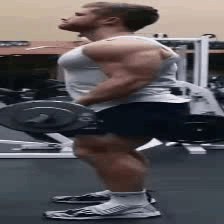

In [ ]:
import imageio
import numpy as np
from IPython.display import Image

def unnormalize_img(img):
    """Un-normalizes the image pixels."""
    img = (img * std) + mean
    img = (img * 255).astype("uint8")
    return img.clip(0, 255)

def create_gif(video_tensor, filename="sample.gif"):
    """Prepares a GIF from a video tensor.

    The video tensor is expected to have the following shape:
    (num_frames, num_channels, height, width).
    """
    frames = []
    for video_frame in video_tensor:
        frame_unnormalized = unnormalize_img(video_frame.permute(1, 2, 0).numpy())
        frames.append(frame_unnormalized)
    kargs = {"duration": 5}
    imageio.mimsave(filename, frames, "GIF", **kargs)
    return filename

def display_gif(video_tensor, gif_name="sample.gif"):
    """Prepares and displays a GIF from a video tensor."""
    video_tensor = video_tensor.permute(1, 0, 2, 3)
    gif_filename = create_gif(video_tensor, gif_name)
    return Image(filename=gif_filename)

sample_video = next(iter(test_dataset))
video_tensor = sample_video["video"]
display_gif(video_tensor)

## Inference

Great, now that you have fine-tuned a model, you can use it for inference!

Load a video for inference:

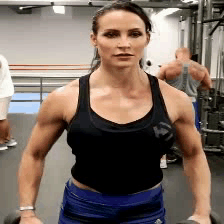

In [ ]:
sample_test_video = next(iter(test_dataset))
video_tensor = sample_test_video["video"]
video_name = sample_test_video["video_name"]
video_label = id2label[sample_test_video["label"]]
display_gif(video_tensor)

In [ ]:
videos = []
labels = []
video_names = []
for sample in test_dataset:
    video_tensor = sample["video"]
    video_label = id2label[sample["label"]]
    video_name = sample["video_name"]
    videos.append(video_tensor)
    labels.append(video_label)
    video_names.append(video_name)


You can also manually replicate the results of the `pipeline` if you'd like.

In [ ]:
import torch
def run_inference(model, video, label):
    # (num_frames, num_channels, height, width)
    perumuted_sample_test_video = video.permute(1, 0, 2, 3)
    inputs = {
        "pixel_values": perumuted_sample_test_video.unsqueeze(0),
        # "labels": torch.tensor(
        #     [label]
        # ),  # this can be skipped if you don't have labels available.
    }

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    inputs = {k: v.to(device) for k, v in inputs.items()}
    model = model.to(device)

    # forward pass
    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits

    return logits

In [ ]:
predicted = []
for index in range(len(videos)):
  logits = run_inference(model, videos[index], labels[index])
  predicted_class_idx = logits.argmax(-1).item()
  predicted.append(model.config.id2label[predicted_class_idx])

In [ ]:
# Chuyển đổi list thành set để loại bỏ các phần tử trùng lặp
S = set(video_names)

print(S.__len__())

188


In [ ]:
S

In [ ]:
from collections import Counter
# List để lưu các id (vị trí) của phần tử từ S trong L
indices = []
predicted2 = []  # Danh sách nhãn dự đoán
actual_labels2 = []  # Danh sách nhãn thực tế
for item in S:
    try:
        # print(item)
        # Lặp qua từng phần tử của S và tìm id của nó trong L
        # Lưu ý: Vòng lặp dưới đây sẽ tìm tất cả các vị trí của item trong L
        indices = [i for i, x in enumerate(video_names) if x == item]
        # print(indices)
        values = [predicted[i] for i in indices]

        # Sử dụng Counter để thống kê và tìm giá trị xuất hiện nhiều nhất
        most_common_value, count = Counter(values).most_common(1)[0]

        print(f'Giá trị xuất hiện nhiều nhất là: {most_common_value} với {count}/{indices.__len__()} lần xuất hiện - label {labels[indices[0]]}')
        actual_labels2.append(labels[indices[0]])
        predicted2.append(most_common_value)
        indices = []
    except ValueError:
        # Nếu phần tử không tồn tại trong L, bỏ qua
        continue


Giá trị xuất hiện nhiều nhất là: tricep pushdown với 2/2 lần xuất hiện - label tricep pushdown
Giá trị xuất hiện nhiều nhất là: lat pulldown với 2/2 lần xuất hiện - label lat pulldown
Giá trị xuất hiện nhiều nhất là: push-up với 1/1 lần xuất hiện - label push-up
Giá trị xuất hiện nhiều nhất là: tricep dips với 3/3 lần xuất hiện - label tricep dips
Giá trị xuất hiện nhiều nhất là: bench press với 2/3 lần xuất hiện - label dbp
Giá trị xuất hiện nhiều nhất là: barbell biceps curl với 1/1 lần xuất hiện - label barbell biceps curl
Giá trị xuất hiện nhiều nhất là: squat với 1/1 lần xuất hiện - label squat
Giá trị xuất hiện nhiều nhất là: tricep dips với 1/1 lần xuất hiện - label tricep dips
Giá trị xuất hiện nhiều nhất là: pull up với 4/4 lần xuất hiện - label pull up
Giá trị xuất hiện nhiều nhất là: pull up với 1/1 lần xuất hiện - label pull up
Giá trị xuất hiện nhiều nhất là: squat với 1/1 lần xuất hiện - label squat
Giá trị xuất hiện nhiều nhất là: romanian deadlift với 1/2 lần xuất hiện 

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


# Assuming 'predicted' and 'actual_labels' are defined lists of predicted and actual labels
acc = accuracy_score(actual_labels2, predicted2)
precision = precision_score(actual_labels2, predicted2, average='micro')
recall = recall_score(actual_labels2, predicted2, average='micro')
F1 = f1_score(actual_labels2, predicted2, average='micro')

print(f"Accuracy: {acc}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {F1}")


Accuracy: 0.9148936170212766
Precision: 0.9148936170212766
Recall: 0.9148936170212766
F1 Score: 0.9148936170212766


In [ ]:
for index, element in enumerate(actual_labels2):
    if index < len(predicted2) and element == predicted2[index]:
        count += 1

print(f"Number of pairs equal in both value and position: {count}")

Number of pairs equal in both value and position: 174
